# Selected topics

## 

### Task 1

Compare the models simulating HHG by a monochromatic laser pulse with intensity $4 × 10^{14} 𝑊/𝑐𝑚2$ and
wavelength 800 nm. The target gas is Ne.

Reproduce the comparative figure of slide 67 (return times calculated with the classical model, and using the
saddlepoint equations (Re($t_r$))).

(Advanced students may calculate the Lewenstein integral, and add the Gabor transform to the plot .)

Compare the shapes of the spectra obtained for the previous generation conditions using the two models.


The difference between two methods is mainly that Classical model doesn't take into account quantum effects. So Classical model has limited accuracy. The good thing about the Saddle-point model is the easy separation of short and long trajectories. Bothmodels are easy to interpret, compare to Lewenshtain integral, for example.

In [33]:
#importing modules
import matplotlib.pyplot as plt
import numpy as np
plt.close('all')

#parameters of the laser pulse
I = 4*10**(18) #W/m^2 intensity
wave = 800*10**(-9) #m the wavelength 

#constants
pi = 3.14
c = 2.99792458*10**(8) #m/s
eps = 8.85 * 10 **(-12) #f/m
m = 9.1093837 * 10**(-31) #kg mass of electron
e = 1.6 *10**(-19) #C charge of electron
h = 6.5821196 * 10**(-16) #eV s plank constant


Compare the models simullating HHG by a monochromatic laser pulse


### 1. Semiclassical three-step model.


First, calculation of basic parameters: energy and angular frequency

In [2]:
E0 = np.sqrt((2*I)/(c*eps)) #V/m maximum energy
om = 2*pi*c/wave # Hz omega

Now we can calculate velocity Vt as a function of time and coordinate xt

Text(0, 0.5, 'Velocity')

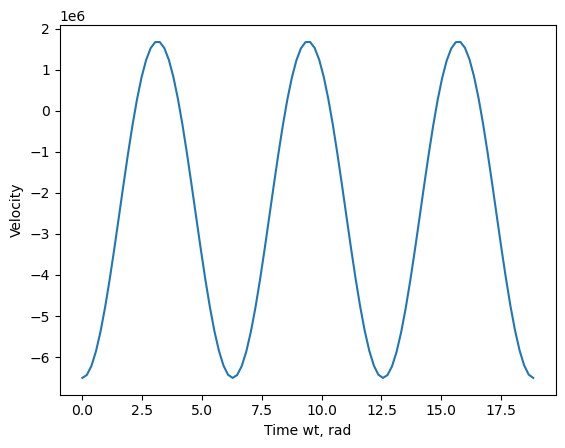

In [3]:
#time variables
t=np.linspace(0,6*pi/om,100)
ti=0.47*pi/om #ionization time
ti2=0.55*pi/om
tr=np.linspace(-om/2, om/2, 100)

#useful timevariables
omt = np.linspace(0,6*pi,100)
omti = 0.7*np.pi
omti2 =0.55*np.pi
omti3 = 0.4 * np.pi
omtr = np.linspace(-2.5, 2.5, 100)

#velocity
Vt = -(e*E0/(m*om))*(np.cos(omt)-np.cos(omti)) #first cos represents wiggle, second drift
plt.figure(1)
plt.plot(omt,Vt)
plt.xlabel('Time wt, rad')
plt.ylabel('Velocity')



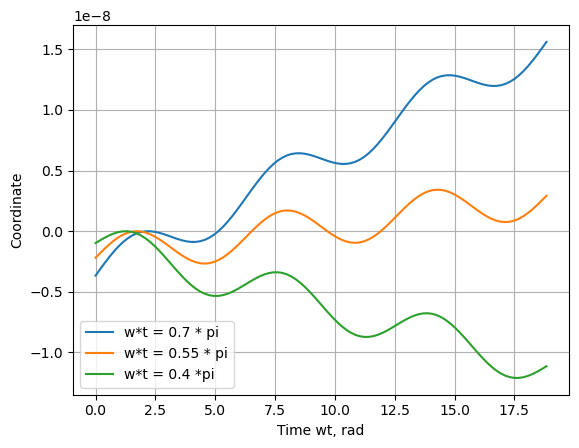

In [24]:
#coordinate
xt = (e*E0/(m*(om**2))*(np.sin(omt)-np.sin(omti)-(omt-omti)*np.cos(omti)))
xt2 = (e*E0/(m*(om**2))*(np.sin(omt)-np.sin(omti2)-(omt-omti2)*np.cos(omti2)))
xt3 = (e*E0/(m*(om**2))*(np.sin(omt)-np.sin(omti3)-(omt-omti3)*np.cos(omti3)))

plt.figure(2)
plt.plot(omt,xt,label='w*t = 0.7 * pi')
plt.plot(omt,xt2,label='w*t = 0.55 * pi')
plt.plot(omt,xt3,label='w*t = 0.4 *pi')

plt.legend(loc='lower left')

plt.xlabel('Time wt, rad')
plt.ylabel('Coordinate')
plt.grid()

if t = ti the velociti is zero


#### Penduromotive energy

In [4]:
#pendoramotive energy 
Up = (I*((e*wave)**2))/(8*(pi**2)*(c**3)*m*eps)/e #eV
Up1 = (e*E0)**2/(4*m*om**2) #not eV

print (Up,'eV')

23.906516037543426 eV


#### Ploting Harmonic order versus time

Text(0.5, 1.0, 'Classical model')

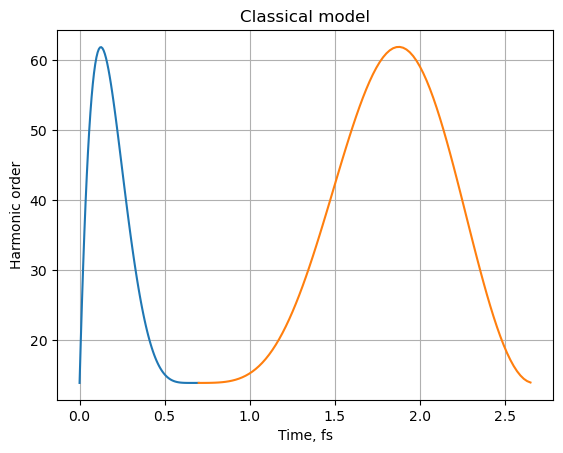

In [5]:
#kinetic energy

#ionization potential of Ne
Ip = 21.5645 #eV

#Cutoff position
Cut = Ip + 3.17*Up #eV

# Time
ti = np.linspace(0, 0.7,100) #fs time
tr2 = np.linspace(0.7, 2.65, 100) #fs time
om_size = 2.3545644 #PHz frequency for convinience

#Harmonic orders
Ekin = (Ip+Up*2*(np.cos(3*np.arcsin(2*om_size*ti/np.pi-1))-np.sin(om_size*ti))**2)/(h*om)
Ekin2 = (Ip+Up*(2*(np.sin(om_size*tr2) - np.cos((pi/2)*np.sin((om_size*tr2/3) - pi/6)))**2))/(h*om)

plt.figure(4)
plt.plot(ti,Ekin)
plt.plot(tr2,Ekin2)

plt.xlabel('Time, fs')
plt.ylabel('Harmonic order')
plt.grid()
plt.title('Classical model')

### Saddle-Point model

Analysis of the Complex Trajectories gives following notation:

Text(0, 0.5, 'Real time of return, cycle')

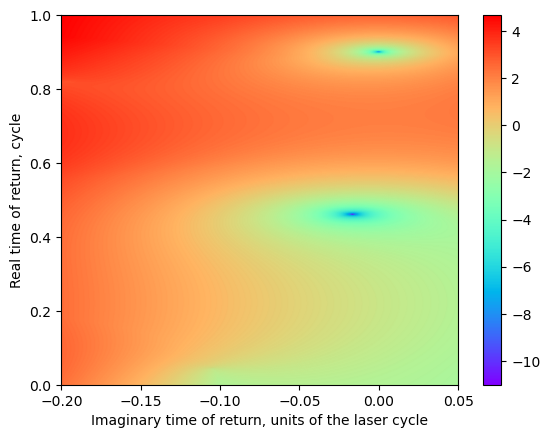

In [26]:
om = om*h #eV
N = 100 #order of harmonic

y = np.sqrt(Ip/(2*Up))
y_N = 0.65160 #full function in Phyton code

#defining the complex plane of the return time
fi_r_real = 2*np.pi*np.linspace(0, 1,1000) #to obtain axis values as in the book
fi_r_imag = 2*np.pi*np.linspace(-0.2, 0.05,1000)

Fi_r_real,Fi_r_imag = np.meshgrid(fi_r_real,fi_r_imag) #grid for plotting the color map

#components of the canonical momentum
p1 = np.cosh(Fi_r_imag)*np.sin(Fi_r_real)+y_N #real
p2 = np.sinh(Fi_r_imag)*np.cos(Fi_r_real) #imaginary

#substitutions for calculations
y_til = y + p2
P = p1**2 + y_til**2 +1
D = np.sqrt(P**2 - 4* p1**2)

fi_i_real = np.arcsin(np.sqrt((P-D)/2))
fi_i_imag = np.arccosh(np.sqrt((P+D)/2))

#function in the plane of the real and imaginary return times
F1 = p1*(Fi_r_real-fi_i_real)-p2*(Fi_r_imag-fi_i_imag)-np.cos(fi_i_real)*np.cosh(fi_i_imag) + np.cosh(Fi_r_imag)*np.cos(Fi_r_real)
F2 = p1*(Fi_r_imag-fi_i_imag) + p2*(Fi_r_real-fi_i_real) + np.sin(fi_i_real)*np.sinh(fi_i_imag)-np.sinh(Fi_r_imag)*np.sin(Fi_r_real)
F = (F1**2 + F2**2)

#plotting colormap
plt.figure()
plt.pcolormesh(Fi_r_imag/(2*np.pi),Fi_r_real/(2*np.pi),np.log(F), shading='gouraud',cmap='rainbow')
plt.colorbar()

plt.xlabel('Imaginary time of return, units of the laser cycle')
plt.ylabel('Real time of return, cycle')


The plot will  significantly change with the change of N.

As it can become a bit complicated to read out the solutions for the graphs, we need to use the gradient method.
But it can be also become a bit complicated to use the gradient method. (I tried, honestly...)

The other way is to look for the projection of the extremum points (min) on both axis.

In [28]:
#start from 15 harmonic 
N=[15,17,19,21,
   23,25,27,29,
   31,33,35,37,
   39,41,43,45, 
   47,49,51,53,
   55,57,59,61,
   63,65,67,71,81]


Time_imag1=[-0.0519,-0.0369,-0.0291,-0.0248,
            -0.0217,-0.0187,-0.0162,-0.0151,
            -0.0136,-0.0110,-0.0112, -0.0097,
            -0.0094,-0.0087,-0.0085, -0.0077,
            -0.0074,-0.0072, -0.0067, -0.0068,
            -0.0062,-0.0064, -0.0064, -0.0065,
            -0.0072,-0.0084, -0.0183,-0.057,-0.0997]

Time_real1=[0.3565, 0.3852, 0.4048, 0.4212, 
            0.4360, 0.4507, 0.4614, 0.4729, 
            0.4835, 0.4950, 0.5046, 0.5139, 
            0.5225, 0.5312, 0.5405, 0.5487, 
            0.5581, 0.5675, 0.5756, 0.5849,
            0.5940, 0.6056, 0.6154, 0.6270,
            0.6409, 0.6577, 0.6827, 0.6939,0.6985]


Time_imag2=[-0.0002,-0.0009,-0.0003,-0.0009,
            -0.0006,-0.0002,-0.0005,-0.0003,
            -0.0002,-0.0002,-0.0009,-0.0002,
            0.0007, 0.0006, 0.0003, 0.0006,
            0.0009, 0.0005, 0.0008, 0.0010,
            0.0010, 0.0012, 0.0015, 0.0017,
            0.0026, 0.0043, 0.0144, 0.0493,0.485]

Time_real2=[0.9760, 0.9542, 0.9402, 0.9296,
            0.9189, 0.9115, 0.9000,0.8935,
            0.8869,0.8763,0.8698,0.8631,
            0.8560, 0.8496, 0.8411, 0.8329,
            0.8261, 0.8187, 0.8103, 0.8025,
            0.7940, 0.7844, 0.7751, 0.7638,
            0.7512,0.7347,0.7107, 0.7012, 0.6984]


Below different plots of the data above is represented.

Text(0.5, 1.0, 'Short')

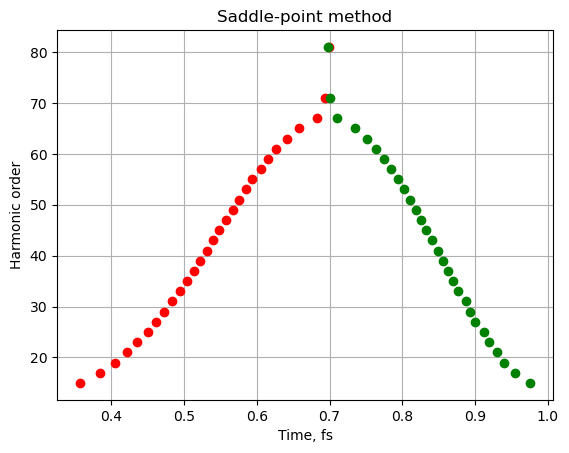

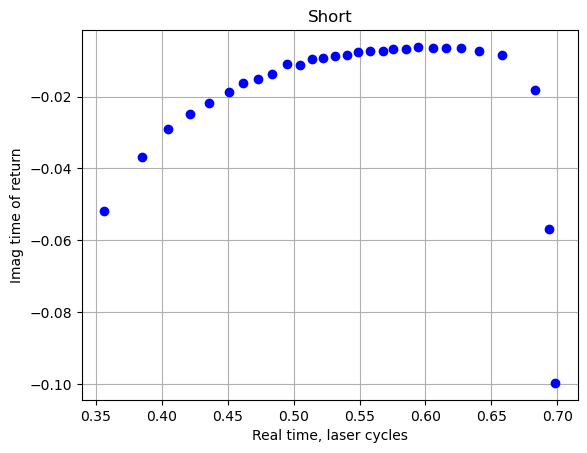

In [34]:
#Here I plot only above the threshold harmonics, due to the data 

#recombination time
plt.figure(5)
plt.plot(Time_real1,N, 'ro')
plt.plot(Time_real2,N, 'go')

plt.xlabel('Time, fs')
plt.ylabel('Harmonic order')
plt.grid()
plt.title('Saddle-point method')

#ration of times, just a plot similar to the book one (7.4 (b))
plt.figure(6)
plt.plot(Time_real1,Time_imag1,'bo')
plt.xlabel('Real time, laser cycles')
plt.ylabel('Imag time of return')
plt.grid()
plt.title('Short')

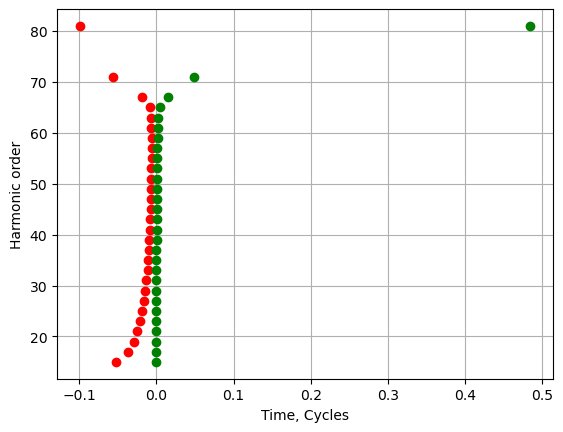

In [30]:
plt.figure(7)
plt.plot(Time_imag1,N, 'ro')
plt.plot(Time_imag2,N, 'go')
plt.xlabel('Time, Cycles')
plt.ylabel('Harmonic order')
plt.grid()

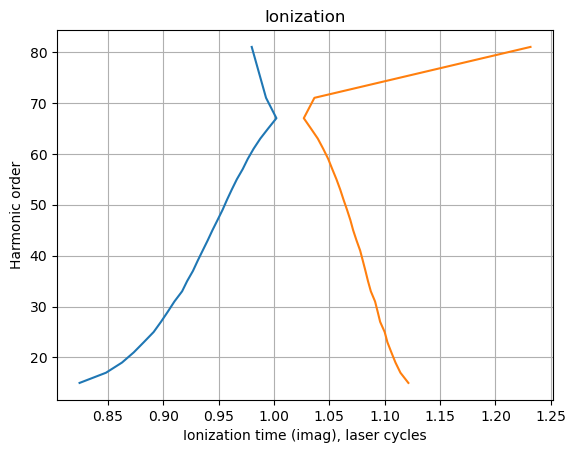

In [31]:
#Some calculations, not sure if useful at all, just some triies...
p1 = np.cosh(Time_imag1)*np.sin(Time_real1)+y_N #real
p2 = np.sinh(Time_imag1)*np.cos(Time_real1) #imaginary


p1_2 = np.cosh(Time_imag2)*np.sin(Time_real2)+y_N #real
p2_2 = np.sinh(Time_imag2)*np.cos(Time_real2) #imaginary

#substitutions for calculations
y_til = y + p2
P = p1**2 + y_til**2 +1
D = np.sqrt(P**2 - 4* p1**2)

#substitutions for calculations
y_til_2 = y + p2_2
P_2 = p1_2**2 + y_til_2**2 +1
D_2 = np.sqrt(P_2**2 - 4* p1_2**2)

FFi_i_real = np.arcsin(np.sqrt((P-D)/2))
FFi_i_imag = np.arccosh(np.sqrt((P+D)/2))

FFi_i_real_2 = np.arcsin(np.sqrt((P_2-D_2)/2))
FFi_i_imag_2 = np.arccosh(np.sqrt((P_2+D_2)/2))


plt.figure(8)
plt.plot(FFi_i_imag,N)
plt.plot(FFi_i_imag_2,N)

plt.xlabel('Ionization time (imag), laser cycles')
plt.ylabel('Harmonic order')
plt.title('Ionization')
plt.grid()


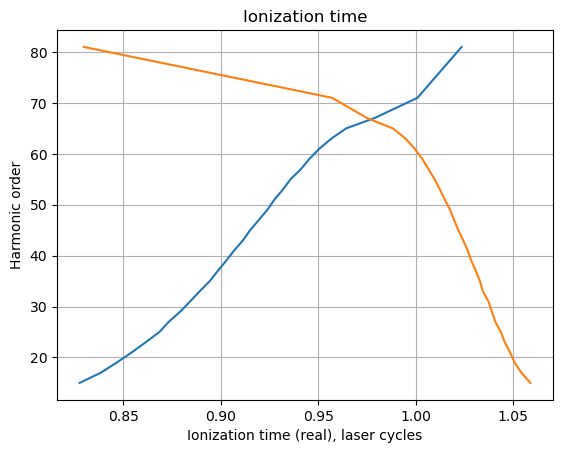

In [32]:
plt.figure(9)
plt.plot(FFi_i_real,N)
plt.plot(FFi_i_real_2,N)

plt.xlabel('Ionization time (real), laser cycles')
plt.ylabel('Harmonic order')
plt.title('Ionization time')
plt.grid()

## Just the whole code together 

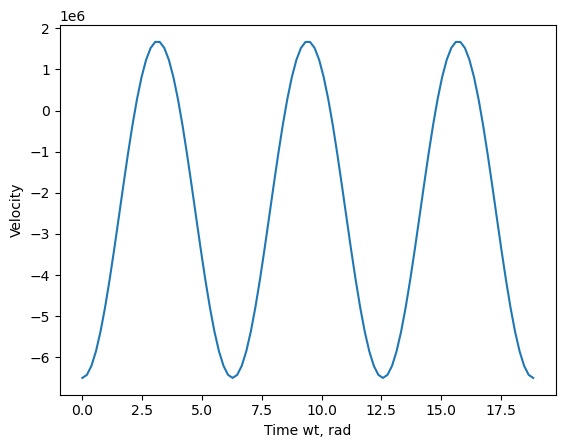

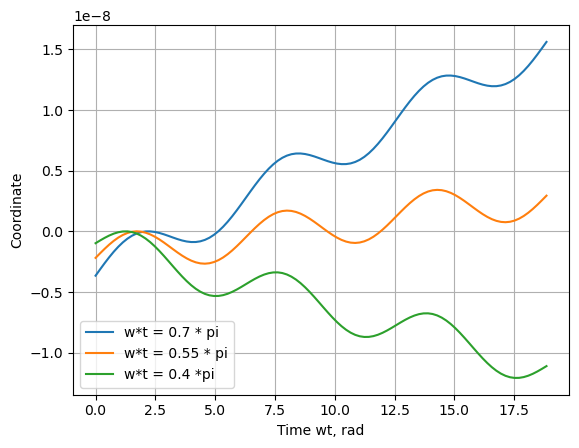

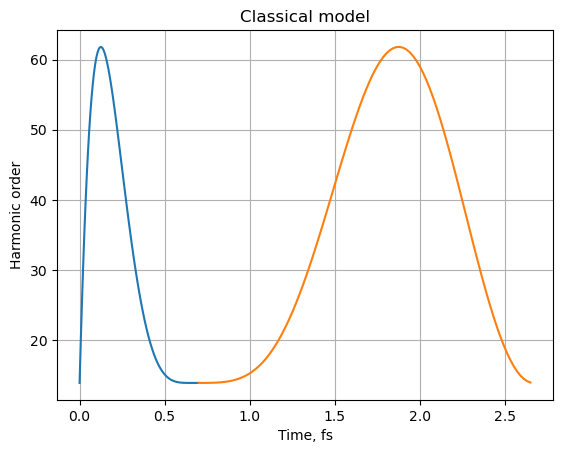

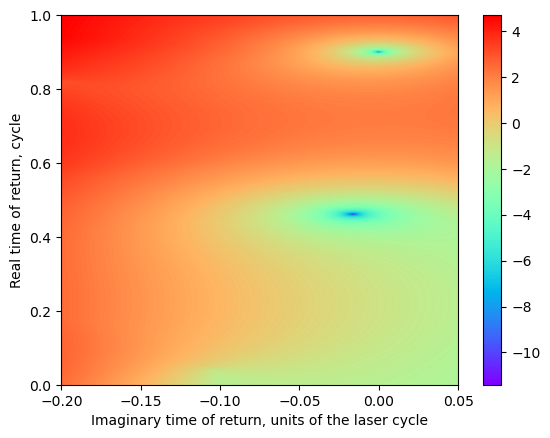

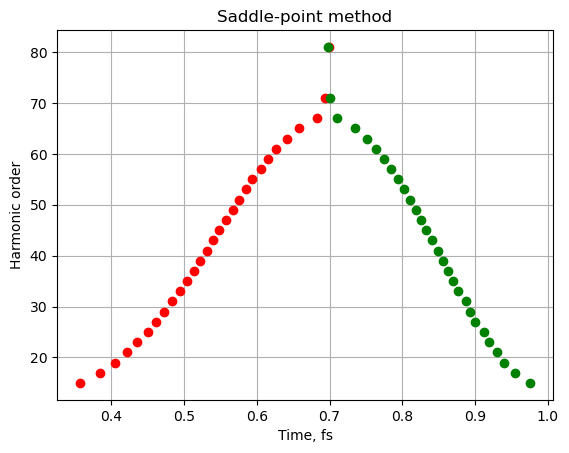

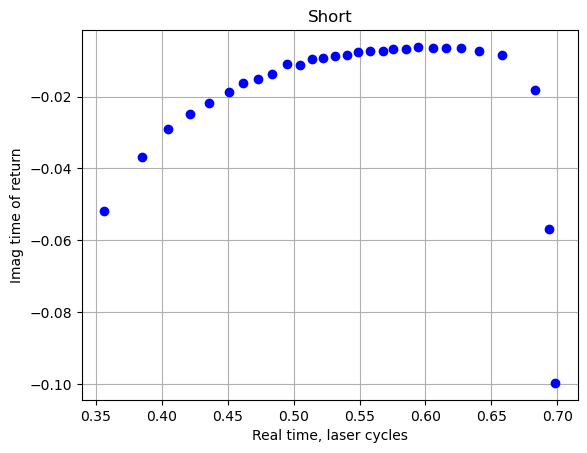

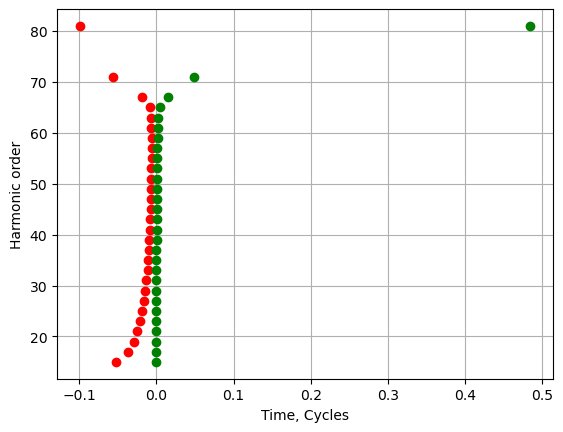

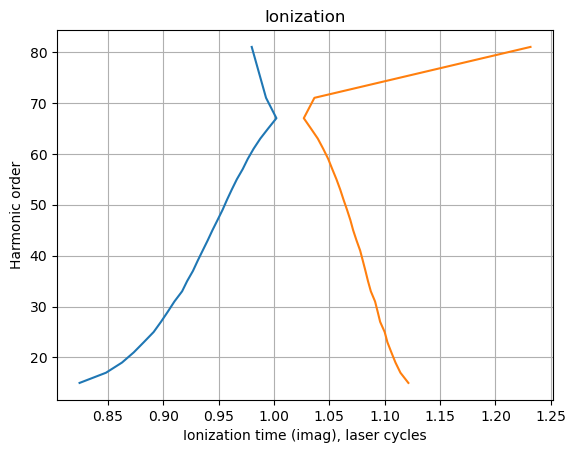

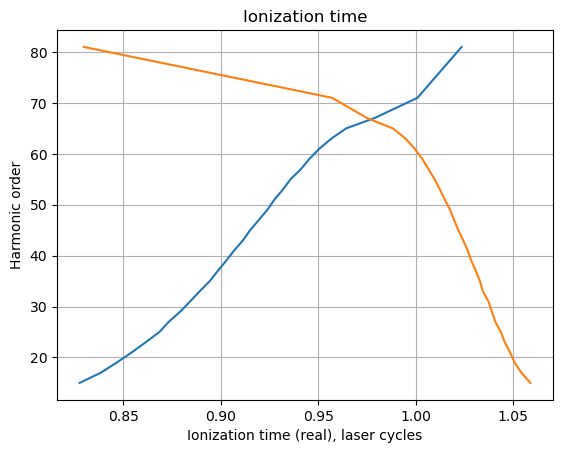

In [27]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct  4 08:33:28 2022

@author: Viktoriia Shiriaeva
"""

#%% 

"""
parameters of the laser pulse

"""
#importing modules
import matplotlib.pyplot as plt
import numpy as np

plt.close('all')

#parameters of the laser pulse
I = 4*10**(14+4) #W/m^2 intensity
wave = 800*10**(-9) #m the wavelength 

#constants
pi = 3.14159265
c = 2.99792458*10**(8) #m/s
eps = 8.85 * 10 **(-12) #f/m
m = 9.1093837 * 10**(-31) #kg mass of electron
e = 1.6 *10**(-19) #C charge of electron
h = 6.5821196 * 10**(-16) #eV s plank constant

"""
Compare the models simullating HHG by a monochromatic laser pulse.


"""

"""
1. Semiclassical three-step model.
"""

E0 = np.sqrt((2*I)/(c*eps)) #V/m maximum energy
om = 2*pi*c/wave # Hz omega

#time variables
t=np.linspace(0,6*pi/om,1000)
ti=0.4*pi/om #ionization time
ti2=0.55*pi/om
tr=np.linspace(-10**(-15), 10**(-15), 100)

#useful timevariables
omt = np.linspace(0,6*pi,100)
omti = 0.7*np.pi
omti2 =0.55*np.pi
omti3 = 0.4 * np.pi
omtr = np.linspace(-2.5, 2.5, 100)

#velocity
Vt = -(e*E0/(m*om))*(np.cos(omt)-np.cos(omti)) #first cos represents wiggle, second drift
plt.figure(1)
plt.plot(omt,Vt)
plt.xlabel('Time wt, rad')
plt.ylabel('Velocity')

""" if t = ti the velociti is zero"""

#coordinate
xt = (e*E0/(m*(om**2))*(np.sin(omt)-np.sin(omti)-(omt-omti)*np.cos(omti)))
xt2 = (e*E0/(m*(om**2))*(np.sin(omt)-np.sin(omti2)-(omt-omti2)*np.cos(omti2)))
xt3 = (e*E0/(m*(om**2))*(np.sin(omt)-np.sin(omti3)-(omt-omti3)*np.cos(omti3)))

plt.figure(2)
plt.plot(omt,xt,label='w*t = 0.7 * pi')
plt.plot(omt,xt2,label='w*t = 0.55 * pi')
plt.plot(omt,xt3,label='w*t = 0.4 *pi')

plt.legend(loc='lower left')

plt.xlabel('Time wt, rad')
plt.ylabel('Coordinate')
plt.grid()

# not useful
x0=(e*E0)/(m*om**2) #m


"""
Penduromotive energy

"""
Ip = 21.5645 #eV ionization potential of Ne

#pendoramotive energy 
Up = (I*((e*wave)**2))/(8*(pi**2)*(c**3)*m*eps)/e #eV
Up1 = (e*E0)**2/(4*m*om**2) #not eV

#Cutoff position
Cut = Ip + 3.17*Up#eV

# Time
ti = np.linspace(0, 0.7,100) #fs time
tr2 = np.linspace(0.7, 2.65, 100) #fs time
om_size = 2.3545644 #PHz frequency for convinience

#Harmonic orders
Ekin = (Ip+Up*2*(np.cos(3*np.arcsin(2*om_size*ti/np.pi-1))-np.sin(om_size*ti))**2)/(h*om)
Ekin2 = (Ip+Up*(2*(np.sin(om_size*tr2) - np.cos((pi/2)*np.sin((om_size*tr2/3) - pi/6)))**2))/(h*om)

plt.figure(3)
plt.plot(ti,Ekin)
plt.plot(tr2,Ekin2)

plt.xlabel('Time, fs')
plt.ylabel('Harmonic order')
plt.grid()
plt.title('Classical model')

"""
Saddle point equation t' ionization time'. Calculate only the real part of the saddle point eq.

"""
#laser field cos is dead, phase is zero
Elas = E0*np.cos(om*t)
A = - (E0/om)*np.sin(om*t)

om = om*h #eV
N = 27 #order of harmonic

y = np.sqrt(Ip/(2*Up))
y_N = np.sqrt((N*om - Ip)/(2*Up))

#defining the complex plane of the return time
fi_r_real = 2*np.pi*np.linspace(0, 1,1000) #to obtain axis values as in the book
fi_r_imag = 2*np.pi*np.linspace(-0.2, 0.05,1000)

Fi_r_real,Fi_r_imag = np.meshgrid(fi_r_real,fi_r_imag) #grid for plotting the color map

#components of the canonical momentum
p1 = np.cosh(Fi_r_imag)*np.sin(Fi_r_real)+y_N #real
p2 = np.sinh(Fi_r_imag)*np.cos(Fi_r_real) #imaginary

#substitutions for calculations
y_til = y + p2
P = p1**2 + y_til**2 +1
D = np.sqrt(P**2 - 4* p1**2)

fi_i_real = np.arcsin(np.sqrt((P-D)/2))
fi_i_imag = np.arccosh(np.sqrt((P+D)/2))

#function in the plane of the real and imaginary return times
F1 = p1*(Fi_r_real-fi_i_real)-p2*(Fi_r_imag-fi_i_imag)-np.cos(fi_i_real)*np.cosh(fi_i_imag) + np.cosh(Fi_r_imag)*np.cos(Fi_r_real)
F2 = p1*(Fi_r_imag-fi_i_imag) + p2*(Fi_r_real-fi_i_real) + np.sin(fi_i_real)*np.sinh(fi_i_imag)-np.sinh(Fi_r_imag)*np.sin(Fi_r_real)
F = (F1**2 + F2**2)

#plotting colormap
plt.figure(4)
plt.pcolormesh(Fi_r_imag/(2*np.pi),Fi_r_real/(2*np.pi),np.log(F), shading='gouraud',cmap='rainbow')
plt.colorbar()

plt.xlabel('Imaginary time of return, units of the laser cycle')
plt.ylabel('Real time of return, cycle')

"""

As it can become a bit complicated to read out the solutions for the graphs, we need to use the gradient method to find minima.


above-threshold harmonics: N*om - Ip>0

the minima define the saddle point solutions for p1 and fi_r_imag
"""
#%% Can hours be converted into grade? ahahah. Sorry... ._.
# I am bad in coding but tried to find a solution

#start from 15 harmonic 
N=[15,17,19,21,
   23,25,27,29,
   31,33,35,37,
   39,41,43,45, 
   47,49,51,53,
   55,57,59,61,
   63,65,67,71,81]


Time_imag1=[-0.0519,-0.0369,-0.0291,-0.0248,
            -0.0217,-0.0187,-0.0162,-0.0151,
            -0.0136,-0.0110,-0.0112, -0.0097,
            -0.0094,-0.0087,-0.0085, -0.0077,
            -0.0074,-0.0072, -0.0067, -0.0068,
            -0.0062,-0.0064, -0.0064, -0.0065,
            -0.0072,-0.0084, -0.0183,-0.057,-0.0997]

Time_real1=[0.3565, 0.3852, 0.4048, 0.4212, 
            0.4360, 0.4507, 0.4614, 0.4729, 
            0.4835, 0.4950, 0.5046, 0.5139, 
            0.5225, 0.5312, 0.5405, 0.5487, 
            0.5581, 0.5675, 0.5756, 0.5849,
            0.5940, 0.6056, 0.6154, 0.6270,
            0.6409, 0.6577, 0.6827, 0.6939,0.6985]


Time_imag2=[-0.0002,-0.0009,-0.0003,-0.0009,
            -0.0006,-0.0002,-0.0005,-0.0003,
            -0.0002,-0.0002,-0.0009,-0.0002,
            0.0007, 0.0006, 0.0003, 0.0006,
            0.0009, 0.0005, 0.0008, 0.0010,
            0.0010, 0.0012, 0.0015, 0.0017,
            0.0026, 0.0043, 0.0144, 0.0493,0.485]

Time_real2=[0.9760, 0.9542, 0.9402, 0.9296,
            0.9189, 0.9115, 0.9000,0.8935,
            0.8869,0.8763,0.8698,0.8631,
            0.8560, 0.8496, 0.8411, 0.8329,
            0.8261, 0.8187, 0.8103, 0.8025,
            0.7940, 0.7844, 0.7751, 0.7638,
            0.7512,0.7347,0.7107, 0.7012, 0.6984]



"""
Around 65 harmonics it is easy to mention the Cut-off
"""
#Here I plot only above the threshold harmonics
#recombination time
plt.figure(5)
plt.plot(Time_real1,N, 'ro')
plt.plot(Time_real2,N, 'go')

plt.xlabel('Time, fs')
plt.ylabel('Harmonic order')
plt.grid()
plt.title('Saddle-point method')

#ration of times
plt.figure(6)
plt.plot(Time_real1,Time_imag1,'bo')
plt.xlabel('Real time, laser cycles')
plt.ylabel('Imag time of return')
plt.grid()
plt.title('Short')

plt.figure(7)
plt.plot(Time_imag1,N, 'ro')
plt.plot(Time_imag2,N, 'go')
plt.xlabel('Time, Cycles')
plt.ylabel('Harmonic order')
plt.grid()


#Some calculations, not sure if useful at all, just some triies...
p1 = np.cosh(Time_imag1)*np.sin(Time_real1)+y_N #real
p2 = np.sinh(Time_imag1)*np.cos(Time_real1) #imaginary


p1_2 = np.cosh(Time_imag2)*np.sin(Time_real2)+y_N #real
p2_2 = np.sinh(Time_imag2)*np.cos(Time_real2) #imaginary

#substitutions for calculations
y_til = y + p2
P = p1**2 + y_til**2 +1
D = np.sqrt(P**2 - 4* p1**2)

#substitutions for calculations
y_til_2 = y + p2_2
P_2 = p1_2**2 + y_til_2**2 +1
D_2 = np.sqrt(P_2**2 - 4* p1_2**2)

FFi_i_real = np.arcsin(np.sqrt((P-D)/2))
FFi_i_imag = np.arccosh(np.sqrt((P+D)/2))

FFi_i_real_2 = np.arcsin(np.sqrt((P_2-D_2)/2))
FFi_i_imag_2 = np.arccosh(np.sqrt((P_2+D_2)/2))


plt.figure(8)
plt.plot(FFi_i_imag,N)
plt.plot(FFi_i_imag_2,N)

plt.xlabel('Ionization time (imag), laser cycles')
plt.ylabel('Harmonic order')
plt.title('Ionization')
plt.grid()


plt.figure(9)
plt.plot(FFi_i_real,N)
plt.plot(FFi_i_real_2,N)

plt.xlabel('Ionization time (real), laser cycles')
plt.ylabel('Harmonic order')
plt.title('Ionization time')
plt.grid()